<a href="https://colab.research.google.com/github/erestrepol/Business-Intelligence/blob/main/Parcial_1_ERL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar las librerias de trabajo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Se carga el archivo y se seleccionan las variables

In [ ]:
nxl='/content/drive/MyDrive/4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl)
XDB=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals','games_played']]
XDB=XDB.dropna()
display(XDB)


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68


#**Implementación del modelo Naive Bayes**

1. Clasificar los jugadores con el promedio de la variable "Games_played"

In [ ]:
import pandas as pd

# Calcular el promedio de la columna 'games_played'
games_played_mean = XDB['games_played'].mean()

# Crear una nueva columna 'above_below_avg'
XDB['above_below_avg'] = XDB['games_played'].apply(lambda x: 1 if x > games_played_mean else 0)

# Mostrar el DataFrame con la nueva columna
print(XDB)

       salary  age  height  weight  games_started  minutes_per_game  assists  \
0      947276   36      79     260            838              32.4      2.7   
1    25000000   37      78     212           1198              36.1      4.7   
2     4088019   39      78     220            954              32.4      3.4   
3     5675000   36      77     195            432              30.9      3.6   
4     5250000   40      83     250           1389              34.0      3.0   
..        ...  ...     ...     ...            ...               ...      ...   
440   1733040   19      78     202              6              14.3      0.6   
441   1140240   21      83     200              4              15.1      0.4   
442   1131960   20      81     220              0               4.2      0.0   
443   3102240   20      77     200             66              30.4      5.5   
444    525093   23      79     185              0               3.5      0.1   

     blocks  steals  games_played  abov


2.Se seleccionan las variables de entrada y salida

In [ ]:
#Se separan las variables de entrada y salida
XD=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']] #Variables de Entrada
yd=XDB[['above_below_avg']] #Variable de Salida - Variable de Pronóstico

Número de datos

In [ ]:
num_datos = len(XD)
print(num_datos)

445


Porcentaje de datos por clasificación

In [ ]:
category_counts = XDB['above_below_avg'].value_counts()
category_percentages = (category_counts / len(XDB)) * 100
print(category_percentages)

above_below_avg
0    57.303371
1    42.696629
Name: count, dtype: float64


3.Se llama al modelo

In [ ]:
from sklearn.naive_bayes import GaussianNB

mnb=GaussianNB ()
mnb.fit(XD,yd)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

4.Media, Varianza, Desviación y límites de las ocho variables

In [ ]:
#Obtenemos la información del modelo
u=mnb.theta_ #Obtenemos la media
print("la media del Salario,Edad,Altura,Peso,Juegos iniciados,Minutos por juego,Asistencia, Bloques, Robos : \n", u)

var=mnb.var_
print("La varianza del Salario,Edad,Altura,Peso,Juegos iniciados,Minutos por juego,Asistencia, Bloques, Robos : \n", var)
sigma=np.sqrt(var)
print("La desviación estándar de la Salario,Edad,Altura,Peso,Juegos iniciados,Minutos por juego,Asistencia, Bloques, Robos : \n", sigma)

#Se determinan los límites superiores e inferiores de las tres variables
LS=u+sigma
LI=u-sigma

print("El limite superior de las ocho variables es \n", LS)
print("El limite inferior de las ocho variables es \n", LI)

la media del Salario,Edad,Altura,Peso,Juegos iniciados,Minutos por juego,Asistencia, Bloques, Robos : 
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La varianza del Salario,Edad,Altura,Peso,Juegos iniciados,Minutos por juego,Asistencia, Bloques, Robos : 
 [[1.15798849e+13 2.73523678e+04 2.73566841e+04 2.80171672e+04
  3.39158480e+04 2.74045416e+04 2.73465659e+04 2.73449991e+04
  2.73449589e+04]
 [3.68265886e+13 2.73570701e+04 2.73564280e+04 2.80246595e+04
  1.10096418e+05 2.73810055e+04 2.73484892e+04 2.73450417e+04
  2.73449657e+04]]
La desviación estándar de la Salario,Edad,Altura,Peso,Juegos iniciados,Minutos por juego,Asistencia, Bloques, Robos : 
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.653

5. Se evalua el desempeño del modelo

In [ ]:
from sklearn.metrics import confusion_matrix

ydp2=mnb.predict(XD)
cm=confusion_matrix(yd,ydp2)
print("La matriz de confusión es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precisión=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
print("La Exactitud es:",Exactitud)
print("La Sensibilidad es:",Sensibilidad)
print("La Especificidad es:",Especificidad)
print("La Precisión es:",Precisión)
print("La Tasa de Error es:",TasaError)
PredNeg=VN/(VN+FP)

La matriz de confusión es:
 [[236  19]
 [ 76 114]]
La Exactitud es: 0.7865168539325843
La Sensibilidad es: 0.6
La Especificidad es: 0.9254901960784314
La Precisión es: 0.8571428571428571
La Tasa de Error es: 0.21348314606741572


6. Determinar la categoría a la que pertenece una persona con las siguientes características mediante la utilización del modelo Naive Bayes:

In [ ]:
XDS=[[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]
ydp= mnb.predict(XDS) #Se obtiene la predicción
print("La predicción del jugador es:\n",ydp)

if ydp==0:
  print("El jugador de la NBA está por debajo del promedio")

if ydp==1:
  print("El jugador de la NBA está por encima del promedio")

La predicción del jugador es:
 [0]
El jugador de la NBA está por debajo del promedio


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# **Modelo Árboles de Decisión**



1. Seleccionamos las variables de entrada y salida

In [ ]:
nxl='/content/drive/MyDrive/4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl)
XDB=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals','games_played']]
XDB=XDB.dropna()
display(XDB)

# Calcular el promedio de la columna 'games_played'
games_played_mean = XDB['games_played'].mean()

# Crear una nueva columna 'above_below_avg'
XDB['above_below_avg'] = XDB['games_played'].apply(lambda x: 1 if x > games_played_mean else 0)

#Se separan las variables de entrada y salida
XD=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']] #Variables de Entrada
yd=XDB[['above_below_avg']] #Variable de Salida - Variable de Pronóstico

,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68


2. Se procede con la implementación del modelo

In [ ]:
#Librerias Árbol
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

#Se procede con la gráfica
from pydotplus import graph_from_dot_data #Me crea la gráfica
from sklearn.tree import export_graphviz #Me exporta a PNG,JPEG,TIFF

ve=['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals'] #Nombres para el Árbol
dot_data=export_graphviz(mar,feature_names=ve) #Crear el gráfico
graph=graph_from_dot_data(dot_data)
graph.write_png('2. ÁrbolDecisiónNBA.png') #Guardar la gráfica

True

3. Número de nodos puros

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Asumiendo que 'mar' es tu modelo de árbol de decisión entrenado

# Obtener el número de nodos en el árbol
n_nodes = mar.tree_.node_count

# Obtener los valores de los nodos (número de muestras por clase)
values = mar.tree_.value

# Contar los nodos puros
pure_node_count = 0
for i in range(n_nodes):
    # Verificar si el nodo es una hoja
    if mar.tree_.children_left[i] == mar.tree_.children_right[i]:
        # Verificar si el nodo es puro (uno de los valores es 0)
        if values[i][0][0] == 0 or values[i][0][1] == 0:
            pure_node_count += 1

print("Número de nodos puros:", pure_node_count)

Número de nodos puros: 6


3. Se procede con el pronóstico de los jugadores de la NBA que no cumplen con el promedio

In [ ]:
# Cargar el archivo Excel con dos hojas
Pronosticar_datos = XDB

XD = XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']]
yd = XDB[['above_below_avg']]


X_pronostico = Pronosticar_datos[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']]

predicciones = mar.predict(X_pronostico)
Pronosticar_datos['Predictions'] = predicciones

# Guardar los resultados en un archivo Excel con una nueva columna de predicciones
Pronosticar_datos.to_excel('pronosticojugadores.xlsx', index=False)

print("Pronóstico completado y guardado en 'pronosticojugadoresNBA.xlsx'")

Pronóstico completado y guardado en 'pronosticojugadoresNBA.xlsx'


4. Evaluación del modelo

In [ ]:
ydp=mar.predict(XD) #Pronóstico sobre la base de datos original
cm=confusion_matrix(yd,ydp) #Matriz de confusión
print("La matriz de confusión es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]


#Métricas de desempeño
Ex=(VP+VN)/(VP+VN+FP+FN)
print("La exactitud del modelo es:\n",Ex)
TE = (FP + FN) / (VP + VN + FP + FN)
print("La tasa de error del modelo es:\n",TE)

Se= VP/(VP+FN)
print("La sensibilidad del modelo es:\n",Se)

Sp=VN/(VN+FP)
print("La especificidad del modelo es:\n",Sp)

Pr= VP/(VP+FP)
print("La precisión del modelo es:\n",Pr)

PredNeg= VN/(VN+FN)
print("La precisión negativa del modelo es:\n",PredNeg)

La matriz de confusión es:
 [[247   8]
 [ 12 178]]
La exactitud del modelo es:
 0.9550561797752809
La tasa de error del modelo es:
 0.0449438202247191
La sensibilidad del modelo es:
 0.9368421052631579
La especificidad del modelo es:
 0.9686274509803922
La precisión del modelo es:
 0.956989247311828
La precisión negativa del modelo es:
 0.9536679536679536


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Modelo K-Means(Clusterización)**

1. Seleccionamos las variables de entrada y salida


In [ ]:
nxl='/content/drive/MyDrive/4. BD2_NBA_Data_M_Int.xlsx'
XDB=pd.read_excel(nxl)
XDB=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals','games_played']]
XDB=XDB.dropna()
display(XDB)

# Calcular el promedio de la columna 'games_played'
games_played_mean = XDB['games_played'].mean()

# Crear una nueva columna 'above_below_avg'
XDB['games_played'] = XDB['games_played'].apply(lambda x: 1 if x > games_played_mean else 0)

#Se separan las variables de entrada y salida
XD=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']] #Variables de Entrada
yd=XDB[['games_played']] #Variable de Salida - Variable de Pronóstico


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,966
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1346
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1274
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1100
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1392
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,70
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,24
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,5
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,68


2. Implementación del modelo

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


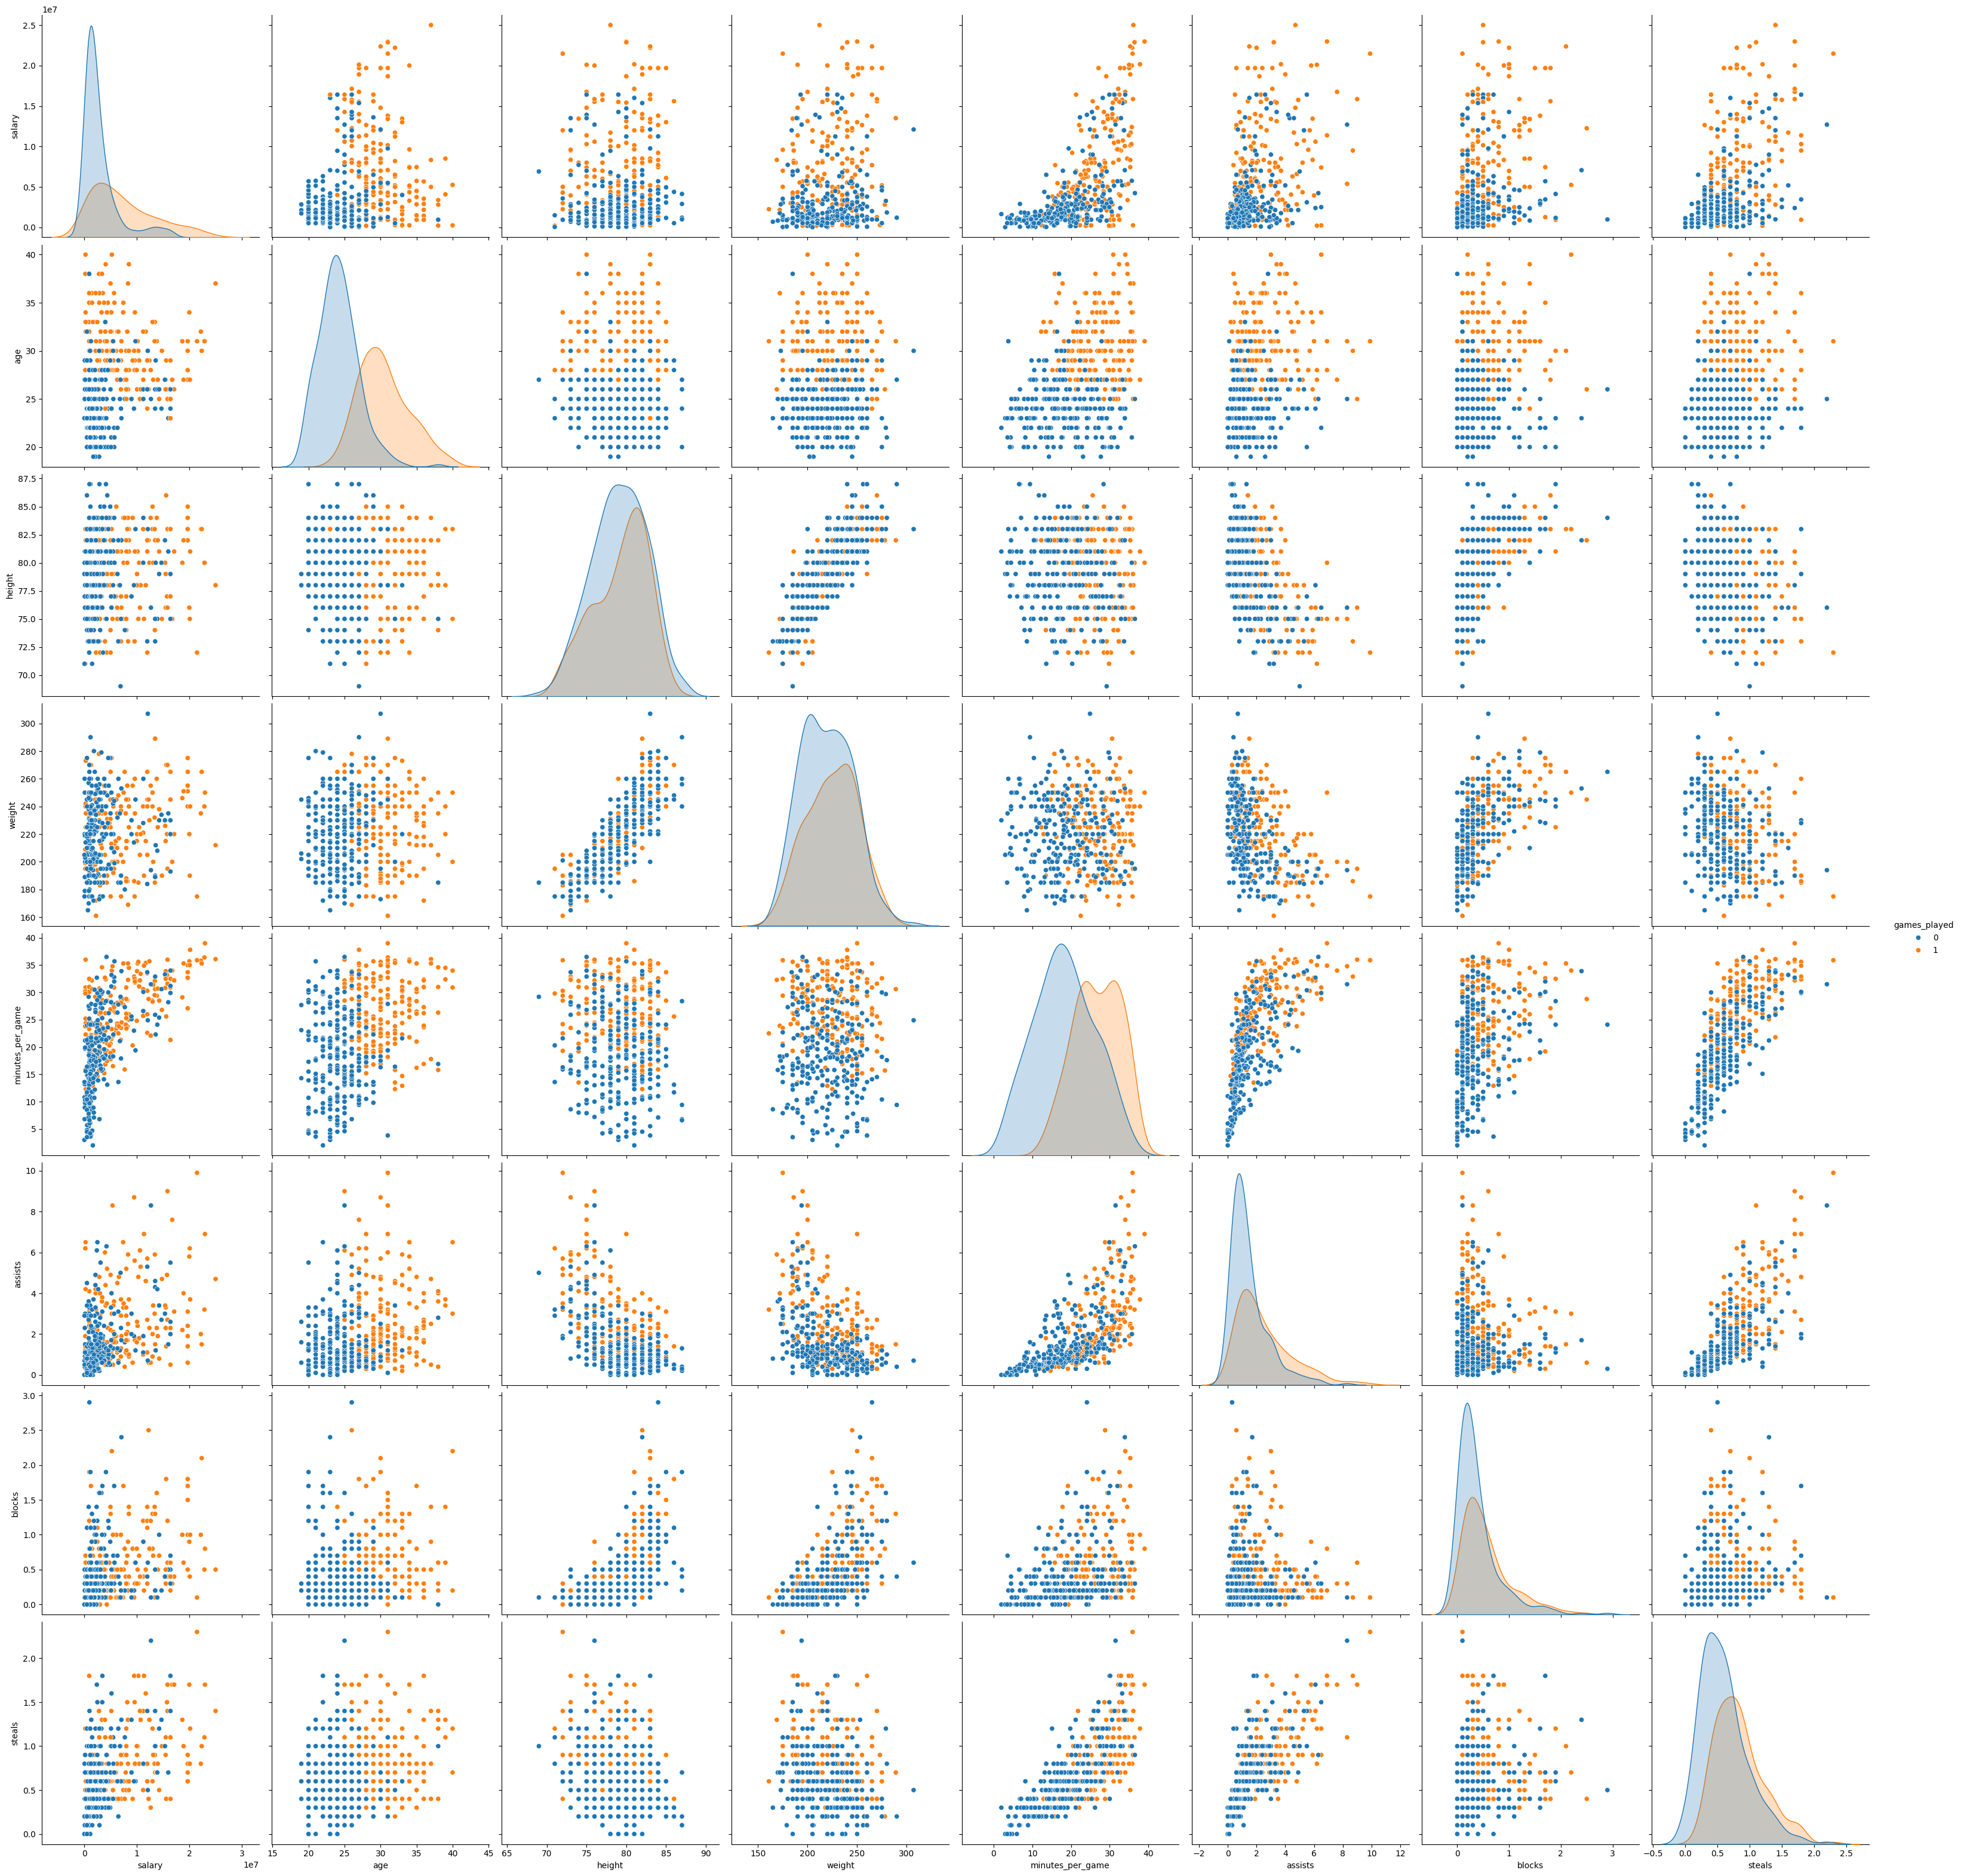

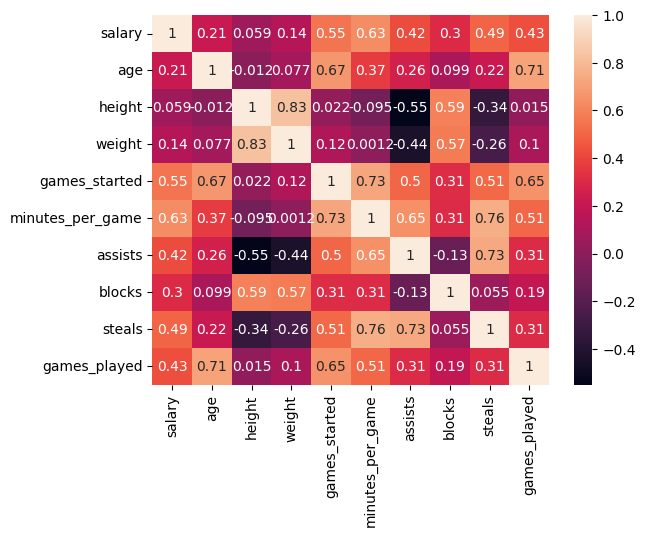

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Se procede con la implementación del modelo

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

XDB=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals','games_played']]
#Para mirar correlaciones y variables importantes
sns.pairplot(XDB.dropna(),hue='games_played',size=4,vars=['salary','age','height','weight','minutes_per_game','assists','blocks','steals'],kind='scatter')
plt.show()

#¿Y cuáles son las correlaciones?
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

3. Se procede con la implementación del modelo de clusterización.

In [ ]:
XD=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']] #Variables de Entrada
yd=XDB[['games_played']]



#Se van a crear cinco montoncitos de datos (perfiles de crédito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=5,init='random',random_state=42)
mkm.fit(XD,yd)
centroids=mkm.cluster_centers_
labels=mkm.labels_
print("Los centroides son:\n",centroids)

#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece un solicitante
display(XDB)

#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es:\n",ND)
PJPP=XDB.groupby('labels').agg({"games_played":lambda x:(x==1).sum()})
PJPDP=XDB.groupby('labels').agg({"games_played":lambda x:(x==0).sum()})
print("El numero de jugadores por encima del promedio por cluster es:\n",PJPP)
print("El numero de jugadores por debajo del promedio por cluster es:\n",PJPDP)


#Se procede con la estimación de los porcentajes de preaprobación
PJPP['games_played']=PJPP=PJPP['games_played']/ND
PJPDP['games_played']=PJPDP=PJPDP['games_played']/ND
print("El porcentaje de aprobados por cluster es:\n",PJPP)
print("El porcentaje de negados por cluster es:\n",PJPDP)

Los centroides son:
 [[1.39398411e+07 2.73469388e+01 7.95510204e+01 2.27857143e+02
  3.96040816e+02 2.98061224e+01 3.04693878e+00 6.93877551e-01
  1.05306122e+00]
 [3.97672950e+06 2.74684685e+01 7.95135135e+01 2.24126126e+02
  2.02702703e+02 2.34585586e+01 1.87027027e+00 4.92792793e-01
  7.04504505e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00]
 [8.03340889e+06 2.86964286e+01 7.86250000e+01 2.19392857e+02
  3.61410714e+02 2.70196429e+01 2.61071429e+00 4.85714286e-01
  8.67857143e-01]
 [1.16304555e+06 2.56948357e+01 7.90328638e+01 2.18370892e+02
  9.97042254e+01 1.69309859e+01 1.36103286e+00 3.50234742e-01
  5.45539906e-01]]


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played,labels
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1,4
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1,2
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,0,4
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,0,4
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,0,4
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,0,1


El tamaño de los clusters es:
 [ 49 111  16  55 214]
El numero de jugadores por encima del promedio por cluster es:
         games_played
labels              
0                 33
1                 52
2                 16
3                 43
4                 46
El numero de jugadores por debajo del promedio por cluster es:
         games_played
labels              
0                 16
1                 59
2                  0
3                 12
4                168
El porcentaje de aprobados por cluster es:
 labels
0    0.673469
1    0.468468
2    1.000000
3    0.781818
4    0.214953
Name: games_played, dtype: float64
El porcentaje de negados por cluster es:
 labels
0    0.326531
1    0.531532
2    0.000000
3    0.218182
4    0.785047
Name: games_played, dtype: float64


4. Evaluación del modelo

In [ ]:
ydp=np.zeros((len(XDB),1))
PJPP=np.array(PJPP);PJPDP=np.array(PJPDP)

for k in range(len(XD)):
  pjpp=labels[k]
  print("La persona tal:",k)
  print("El cluster al que pertenece el jugador es:",PJPP)
  print("El procentaje de Jugadores por encima del promedio es:",PJPP[pjpp])
  print("El procentaje de Jugadores por debajo del promedio es:",PJPDP[pjpp])

  if PJPP[pjpp]>PJPDP[pjpp]:
    ydp[k]=1
  else:
    ydp[k]=0


La persona tal: 0
El cluster al que pertenece el jugador es: [0.67346939 0.46846847 1.         0.78181818 0.21495327]
El procentaje de Jugadores por encima del promedio es: 0.21495327102803738
El procentaje de Jugadores por debajo del promedio es: 0.7850467289719626
La persona tal: 1
El cluster al que pertenece el jugador es: [0.67346939 0.46846847 1.         0.78181818 0.21495327]
El procentaje de Jugadores por encima del promedio es: 1.0
El procentaje de Jugadores por debajo del promedio es: 0.0
La persona tal: 2
El cluster al que pertenece el jugador es: [0.67346939 0.46846847 1.         0.78181818 0.21495327]
El procentaje de Jugadores por encima del promedio es: 0.46846846846846846
El procentaje de Jugadores por debajo del promedio es: 0.5315315315315315
La persona tal: 3
El cluster al que pertenece el jugador es: [0.67346939 0.46846847 1.         0.78181818 0.21495327]
El procentaje de Jugadores por encima del promedio es: 0.46846846846846846
El procentaje de Jugadores por debajo

5. Se procede a evaluar el modelo (matriz de confusión)

In [ ]:
cm=confusion_matrix(yd,ydp)
print("La matriz de confusión es:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precisión=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
print("La Exactitud es:",Exactitud)
print("La Sensibilidad es:",Sensibilidad)
print("La Especificidad es:",Especificidad)
print("La Precisión es:",Precisión)
print("La Tasa de Error es:",TasaError)
PredNeg=VN/(VN+FP)

La matriz de confusión es:
 [[227  28]
 [ 98  92]]
La Exactitud es: 0.7168539325842697
La Sensibilidad es: 0.4842105263157895
La Especificidad es: 0.8901960784313725
La Precisión es: 0.7666666666666667
La Tasa de Error es: 0.28314606741573034


6. Determinar las variables con mayor correlación

In [ ]:
import pandas as pd
import numpy as np

# Calcula la matriz de correlación
corr_matrix = XDB.corr()

# Elimina 'games_played' de la matriz de correlación
corr_matrix = corr_matrix.drop('games_played', axis=0).drop('games_played', axis=1)

# Elimina la diagonal (correlación de una variable consigo misma)
corr_matrix = corr_matrix.mask(np.equal(*np.indices(corr_matrix.shape)))

# Encuentra las dos variables con mayor correlación absoluta
max_value = np.nanmax(corr_matrix)  # Valor máximo de correlación
row_max, col_max = corr_matrix[corr_matrix == max_value].stack().idxmax()  # Variables correspondientes

# Imprime el resultado
print(f"Las dos variables con mayor correlación (excluyendo games_played) son: {row_max} y {col_max} con una correlación de {max_value}")

# Para obtener todas las correlaciones por encima de un umbral (por ejemplo, 0.7):
threshold = 0.5  # Define tu umbral
high_corr = corr_matrix[abs(corr_matrix) > threshold].stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlación']
print("\nVariables con correlación por encima del umbral:")
print(high_corr)

Las dos variables con mayor correlación (excluyendo games_played) son: height y weight con una correlación de 0.8261057760825833

Variables con correlación por encima del umbral:
          Variable 1        Variable 2  Correlación
0             salary     games_started     0.546786
1             salary  minutes_per_game     0.633004
2             salary            labels    -0.613868
3                age     games_started     0.668841
4             height            weight     0.826106
5             height           assists    -0.549919
6             height            blocks     0.590399
7             weight            height     0.826106
8             weight            blocks     0.572303
9      games_started            salary     0.546786
10     games_started               age     0.668841
11     games_started  minutes_per_game     0.726118
12     games_started            steals     0.511437
13  minutes_per_game            salary     0.633004
14  minutes_per_game     games_started   

7. Determinar la categoría a la que pertenece una persona con las siguientes características mediante la utilización del modelo de Clustering y graficar:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


la persona pertenece al cluster: [1]
El porcentaje de jugadores por encima del promedio por cluster es es:
 [0.67346939 0.46846847 1.         0.78181818 0.21495327]
El porcentaje de jugadores por debajo del promedio por cluster es:
 [0.32653061 0.53153153 0.         0.21818182 0.78504673]


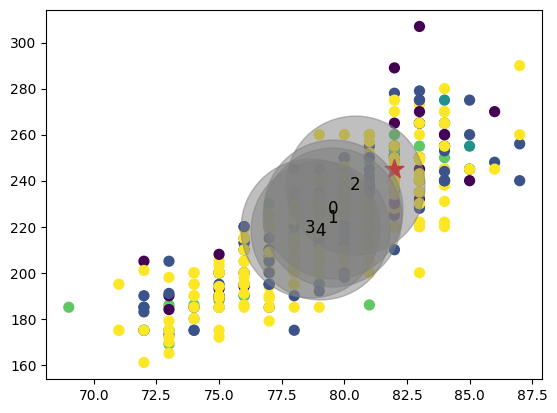

In [ ]:
XD1=np.array([(5000000,37,82,245,45,17.8,0.5,1.4,0.4)])

ydn=mkm.predict(XD1)
print("la persona pertenece al cluster:",mkm.predict(XD1))
print("El porcentaje de jugadores por encima del promedio por cluster es es:\n",PJPP)
print("El porcentaje de jugadores por debajo del promedio por cluster es:\n",PJPDP)

XD=np.array(XD)
plt.scatter(XD[:,2],XD[:,3],c=labels,s=50,cmap='viridis')
plt.scatter(XD1[:,2],XD1[:,3],marker='*',s=200,facecolors='red')
plt.scatter(centroids[:,2],centroids[:,3],marker='*',s=200,facecolors='yellow')
plt.scatter(centroids[:,2],centroids[:,3],alpha=0.5,marker='o',s=10000,facecolors='grey')

for i, c in enumerate (centroids):
  plt.text(c[2],c[3],str(i),fontsize=12,color='black',ha='center',va='center')


#**Análisis de Resultados**
El propósito de este análisis fue evaluar la capacidad de los modelos Naive Bayes, Árbol de Decisión y K-Means para predecir si un jugador de la NBA ha jugado por encima o por debajo del promedio de partidos jugados en la base de datos que contiene en total 445 registros. Para ello se tomaron ocho variables de entrada y una variable de salida, permitiendo a cada modelo generar sus respectivas predicciones.

El modelo de Naive Bayes mostró que el 57.30% de los jugadores juegan por debajo del promedio, mientras que el 42.69% están por encima, lo que sugiere que hay una mayor proporción de jugadores con menos participación. Se observó que quienes juegan más partidos suelen tener un salario medio más alto (7.4 millones) en comparación con aquellos por debajo del promedio (2.9 millones), aunque con una desviación estándar elevada, lo que indica una gran variabilidad en los ingresos. También se identificó que los jugadores con más partidos tienden a ser mayores en edad (30.5 años en promedio). Aunque la precisión del modelo fue del 85% y su especificidad del 92%, su sensibilidad del 60% evidencia una menor capacidad para identificar correctamente a los jugadores con más juegos jugados.

El modelo de Árbol de Decisión, en cambio, se destacó significativamente al encontrar 6 nodos puros, lo que sugiere que logró segmentar grupos de jugadores con características bien definidas. Se puco identificar que la edad es la variable más determinante para predecir si un jugador juega más partidos, probablemente debido a la relación entre experiencia y tiempo en la cancha. Además, la variable juegos iniciados resultó ser un indicador clave, lo que tiene sentido ya que quienes inician más juegos suelen jugar más minutos y participar en más encuentros, con una exactitud del 95%, una sensibilidad del 93% y una especificidad del 96%, este modelo logró un equilibrio ideal entre identificar correctamente tanto a los jugadores con más como con menos partidos jugados, haciéndolo el más confiable de los tres.

Por otro lado, el modelo K-Means mostró una alta variabilidad en la clasificación de los jugadores dentro de sus clústeres. Se observó que el clúster 4 contenía exclusivamente jugadores por encima del promedio (100%), mientras que el clúster 2, que agrupaba a la mayor cantidad de jugadores (214), solo tenía un 2% de jugadores por encima del promedio, lo que indica una agrupación desigual en los segmentos. También se encontró una fuerte correlación del 82.6% entre el peso y la altura, lo que sugiere que estas variables están estrechamente relacionadas en la clasificación. Sin embargo, el desempeño general del modelo fue menor que el de los otros dos, con una exactitud del 71%, una sensibilidad del 48% y una precisión del 76%, lo que evidencia que su capacidad predictiva es moderada y menos confiable.

En definitiva, el Árbol de Decisión fue el modelo con mejor desempeño entre los tres, logrando la mayor exactitud y balance entre sensibilidad y especificidad, lo que lo convierte en la mejor herramienta para predecir la variable games_played. Naive Bayes aunque aceptable, tuvo dificultades para identificar correctamente a los jugadores con más partidos, mientras que K-Means mostró un rendimiento más bajo en términos de predicción, aunque podría ser útil para segmentar jugadores con características similares.